# Brute force descriptors matching

<p>This notebook demostrates SIFT and ORB descriptors matching

<small>Author: Fernando Carlos López Hernández</small>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im1 = cv2.imread('images/buildings1.jpg')
im2 = cv2.imread('images/buildings2.jpg')

First we compute the SIFT and ORB keypoints and descriptors

In [2]:
# Compute SIFT descriptors
hessian_threshold = 50
mask = None
sift = cv2.SIFT_create(hessian_threshold)
sift_keypoints1, sift_descriptors1 = sift.detectAndCompute(im1, mask)
sift_keypoints2, sift_descriptors2 = sift.detectAndCompute(im2, mask)

# Compute the ORB descriptors
nfeatures = 20
orb = cv2.ORB_create(nfeatures)
orb_keypoints1, orb_descriptors1 = orb.detectAndCompute(im1, mask)
orb_keypoints2, orb_descriptors2 = orb.detectAndCompute(im2, mask)

Next we perform brute force matching using cv2.BFMatcher for SIFT and ORB, which use L2 norm and Hamming distance, respectively

In [3]:
# BF match with cv2.NORM_L2
bf_matcher = cv2.BFMatcher(cv2.NORM_L2)
matches = bf_matcher.match(sift_descriptors1, sift_descriptors2)
# Sort the matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# Create the matching image
im_sift_result = cv2.drawMatches(im1, sift_keypoints1, im2, sift_keypoints2, matches[:20], outImg=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
im_sift_result= cv2.cvtColor(im_sift_result, cv2.COLOR_BGR2RGB)

# BF match with cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
bf_matcher = cv2.BFMatcher(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = bf_matcher.match(orb_descriptors1, orb_descriptors2)
# Sort the matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# Create the matching image
im_orb_result = cv2.drawMatches(im1, orb_keypoints1, im2, orb_keypoints2, matches[:20], outImg=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
im_orb_result= cv2.cvtColor(im_orb_result, cv2.COLOR_BGR2RGB);

Finally, we show the results

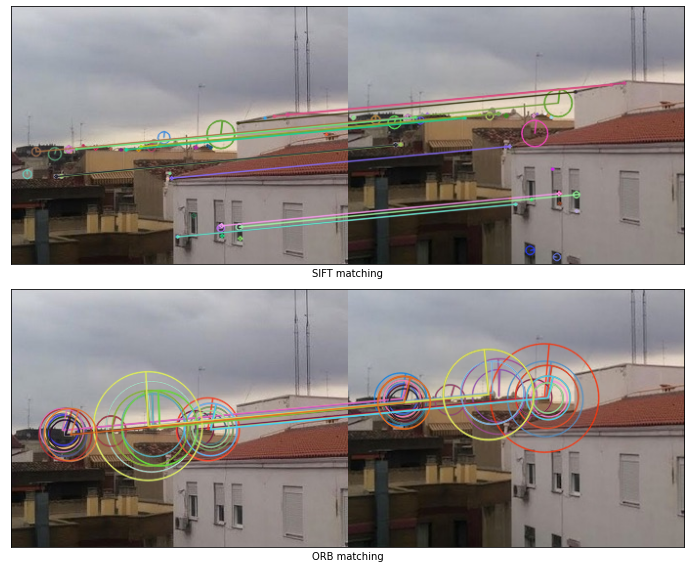

In [4]:
fig, axes = plt.subplots(2,1, figsize=(15, 8))
axes[0].imshow(im_sift_result); axes[0].set_xlabel('SIFT matching')
axes[1].imshow(im_orb_result); axes[1].set_xlabel('ORB matching')
for ax in fig.axes:
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
plt.tight_layout()
plt.show()